# Dimensionality reduction

## Setup

In [3]:
import sys
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'dim_reduction'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

As you already know, Machine learning problems involve thousands or even millions of features for each training instance and this features make training extremely slow, making much harder to find a good solution. This problem is often referred to as the curse of dimensionality.

Fortunately, in real-world problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization, by reducing in one the dimensions of the features, with luck it will becomes in a two or three dimensions, making it possible to plot a condensed view of a high-dimensional training set on a graph and gain some important insights by visually detecting patterns such as clusters. 

In this script we will review the curse of dimensionality and get a sense of what goes on in high-dimensional space. We will review the two main approaches to dimensionality reduction (projection and Manifold Learning), and we will go through three of the most popular dimensionality reduction techniques: PCA, Kernel PCA and LLE.

## The Curse of Dimensionality

We are so used to living in three dimension that our intuition fails us when we try to imagine a high-dimensional space. Many things behave differently in high-dimensional space. For example, pick a random point in a unit square (a 1 x 1 square), there is a chance of about 0.4% that the point will be located less than 0.001 from a border, very unlilekly that the point will be in an extreme part. But in a 10,000 dimensional unit hypercube, this probability rises up to 99.99%. Most points in a high-dimensional hypercube are very cole to the border.

Here is another difference: if you pick two points randomly in a unit square, the average distance between these two points will be 0.52. If you take now two points in a unit 3D cube, the average distance will be 0.66, and so on. In a hypercube of 1,000,000 dimensionality the average distance between two points will be 408.25. The reason of that is that there is more space in high dimensions.

This becomes a problem when becoming of datasets, because high-dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other, and also new instances will be likely far away from any training instance, making predictions much less reliable than in lower dimensions.

In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances, but in practice the number of training instances required to reach a given density grows exponentially with the number of dimensions.

## Main Approaches for Dimensionality Reduction

There are two approaches to reducing dimensionality: projection and Manifold Learning

### Projection

In most real-world problems, training instances are not spread out uniformly across all dimension. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within a much lower-dimensional subspace of the high-dimensional space. In the following graph its a 3D dataset lying close to a 2D subspace.

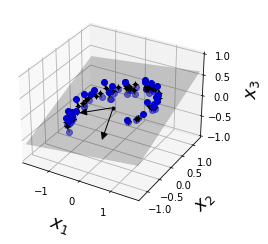

In [47]:
fig

All training instances lie close to a plane, this is a lower dimensional (2D) subspace of the high-dimensional (3D) space. If the training instance is projected perperdicularly onto this subspace we get the new 2D dataset shown below. With this it has been reduced the dataset's dimensionality from a 3D to a 2D. Now the axes correspond to new features $z_1$ and $z_2$ 

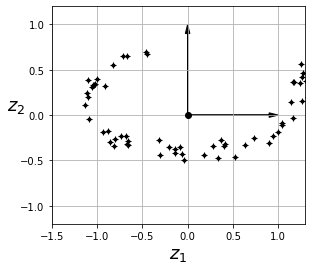

In [51]:
fig2

However, projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn. Such as the Swiss roll toy dataset presented below.

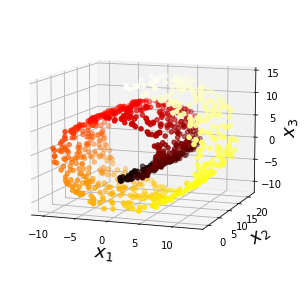

In [78]:
fig3

If we project onto a plane the Swiss roll would squash different layers, as shown on the left side of the below figure, in this case is better to unroll the Swiss roll to obtain the 2D dataset on the right side

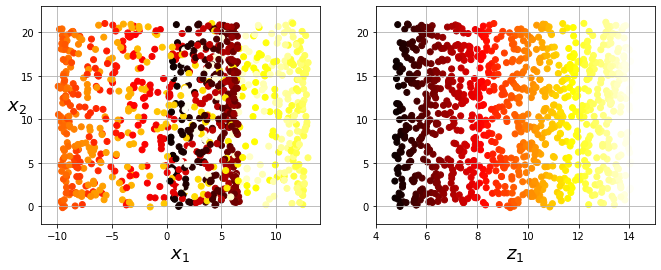

In [89]:
fig4

### Manifold Learning

The swiss roll is an example of a 2D manifol. A d-dimensional manifold is a part of an n-dimensional space (where $d<n$) that locally resembles a d-dimensional hyperplane. In some cases, it locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie, this is called Manifold Learning. It relies on the manifold assumption which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed

The manifold assumption is often accompanied by another implicit assumption: that the task at hand (classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold. For example, in the below figure, the Swiss roll is split into two classes: the 3D has a fairly complex decision boundary:



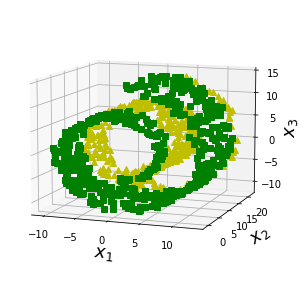

In [97]:
fig5

but once it's unrolled into a 2D manifold space, the decision boundary is a straight line as shown below:

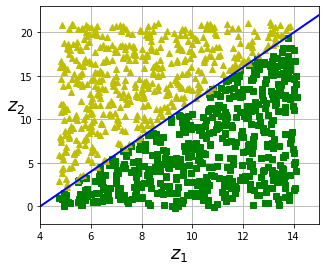

In [101]:
fig6

However, this implicit assumption does not always hold. For example in the following figure, the decission boundary is located at $x_1$=5. The decision boundary looks very simple in the original 3D space (a vertical plane)

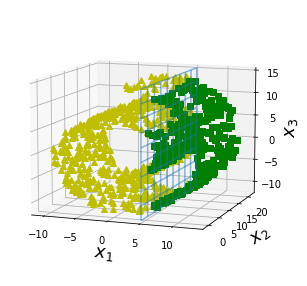

In [103]:
fig7

But it looks more complex in the unrolled manifold.

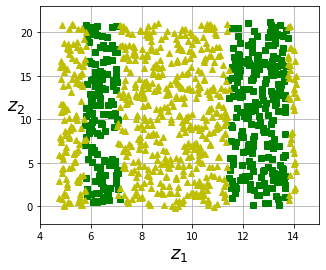

In [105]:
fig8

In short, reducing the dimensionality of the training set before training the model will usually speed up training, but it may not always lead to a better or simpler solution , it all depends on the dataset.

With the explanation of the two approaches to make dimensionality reduction, the rest of the notes will go through some of the most popular algorithms

## PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

## Preserving the Variance

Before you can project the training set onto a lower-dimensional hyperplane, first you need to check the right hyperplane. For example in the following figure, a simple 2D dataset is represented on the left side, with three different axes. The projection onto the solid line preserves the maximum variance (top right), while the projection onto the dotted line preserves very little variance (bottom right) and the dashed line preserves an intermediate amount of variance.

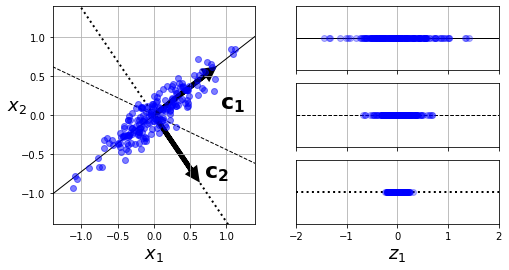

In [111]:
fig9

It will be preferably to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections. Another way to justify the dimention reduction is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is the simple idea behind PCA.

### Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the training sets, it also finds a second axis, orthogonal to the first one, PCA find a third axis, and so on.

Th $i^{th}$ axis is called the $i^{th}$ _principal component_ (PC) of the data.

To obtain the PC in a training set use the standard matrix factorization technique called _Singular Value Decomposition_ (SVD). The following code uses NumPy's svd() function to obtain all the principal components of the training set, then extracts the two unit vectors that define the first two PCs, but first it will be build a simple 3D dataset:

In [112]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m,3))
X[:,0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:,1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:,2] = X[:,0] * w1 + X[:,1] * w2 + noise * np.random.randn(m)

In [113]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

PCA assumes that the dataset is centered around the origin. So if we implement PCA ourself (as in the preceding example), we need to center the data first

### Projecting Down to d Dimensions

Once identified all the principal components, the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first _d_ principal components. Selecting this hyperplane ensures that the projection will preserve as much variance as possible. The following Python code projects the training set onto the plane defined by the first two principal components:

In [118]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

In [120]:
X2D_using_svd = X2D

There you have it! With this code now you know how to reduce the dimensionality of any dataset down to any number of dimensions, while preserving as much variance as possible. Let's calculate it now with the Scikit-Learn

### Using Scikit-Learn

Scikit-Learn PCA class usses SVD decompositiont to implement PCA. The following code applied PCA ro reduce the dimensionality of the dataset down to two dimensions:

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

Now let's compare the two procedures X2D is using Scikit-Learn and X2D_using_svd

In [123]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [124]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

Great we have the same digits in each field, however, remember that the sign just indicate the direction of the data.

In [125]:
np.allclose(X2D, -X2D_using_svd)

True

### Explained Variance Ratio

Another useful information is the _explained variance ratio_ of each principal component, available with the explained_variance_ratio_ variable. It indicates the proportion of the dataset's variance that lies along each principal component. For example, let's look at the explained variance ratios of the first two components of the 3D dataset:

In [126]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This says that 84.2% of the dataset's variance lies along the first PC, and 14.6% lies along the second PC. This leaves less than 1.2% for the third PC, so it is reasonable to assume that the third PC probably carries little information.

By projecting down to 2D, we lost about 1.1% of the variance:

In [127]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

### Chosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance (>95%).

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set's variance, the code is run in the MNIST dataset

In [128]:
from sklearn.datasets import fetch_openml

In [129]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [130]:
from sklearn.model_selection import train_test_split

Xm = mnist['data']
ym = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(Xm, ym)

In [133]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1

In [134]:
d

154

You could specify the number of principal components you want to preserve, by setting the n_components between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [135]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [136]:
pca.n_components_

154

Right we have the same ratio of variance, we can make now a plot of it.

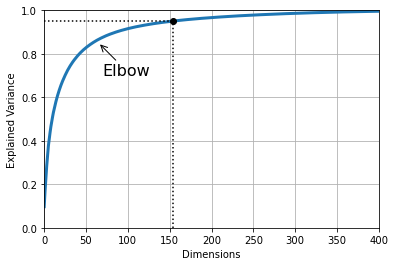

In [137]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, 'ko')
plt.annotate('Elbow', xy=(65, 0.85), xytext=(70, 0.7),
            arrowprops=dict(arrowstyle='->'), fontsize=16)
plt.grid(True)
plt.show()

The elbow in the curve, explain the variace stop from growing fast. In this case, you can see that reducing the dimensionality down to about 100 dimensions wouldn't lose too much explained variance

### PCA for Compression

Another advantage of compression is that the training set takes up much less space. For example, take the MNIST data set and apply PCA, it's preserved 95% of its variance, by reducing each instance to 150 features from 784. So while most of the variance is preserved, the dataset is now less than 20% of its original size! Also this size reduction can speed up a classification algorithm (such as an SVM classifier) tremendously.

An inverse process called decompress to return the dataset to its original 784 dimensions can be applied by using the inverse transformation of the PCA projection. This won't give you back the original data, since the projection lost a bit of information, but it will likely close to the original data. The mean square distance between the original data and the reconstructed data (compressed and then decompressed) is called the reconstruction error.

The following code compresses the MNIST dataset down to 154 dimensions, then uses the inverse_transform() method to decompress it back to 784 dimensions:

In [151]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

A code to plot the numbers

In [139]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows= (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis('off')

And the result

Text(0.5, 1.0, 'Compressed')

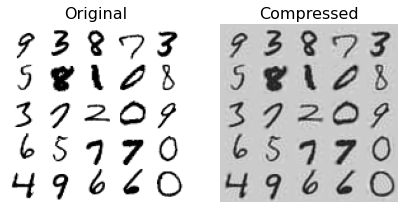

In [141]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title('Original', fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title('Compressed', fontsize=16)

In [152]:
X_reduced_pca = X_reduced

### Randomized PCA

The hyperparameter svd_solver set in "randomized" will resolve the algorithm in an stochastic way and its called _Randomized PCA_, it's quicker than full SVD, especially when d is much smaller than n:

In [154]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA

A problem in the implementation of PCA is that it requires the whole training set to fit in memory in order for the algorithm to run. Fortunately, _Incremental PCA_ (IPCA) algorithms have been developed. They allow you to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time.

This is useful training large datasets or for applying PCA online-

The following code splits MNIST dataset into 100 mini-batches (using Numpy's array_split() function) and feeds them to Scikit-Learn's IncrementalPCA class to reduce the dimensionality of the MNIST dataset down to 154. This time you must call the partial_fit() method with each mini-batch, rather than the fit() method with the whole training set:

In [155]:
from sklearn.decomposition import IncrementalPCA

In [156]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print('.', end='')
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [157]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

Let's check that compression still works well

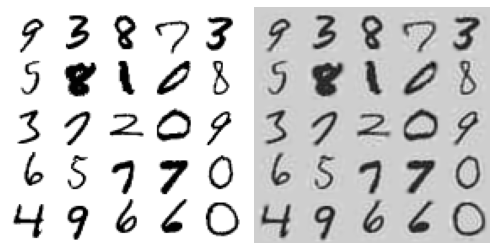

In [158]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [159]:
X_reduced_inc_pca = X_reduced

Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means:

In [160]:
np.allclose(pca.mean_, inc_pca.mean_)

True

But the results are not exactly identical. Incremental PCA gives a very good approximate solution, but it's not perfect

In [161]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

### Time complexity between algorithms

Let's time regular PCA against Incremental PCA and Randomized PCA, for various number of principal components:

In [163]:
import time

for n_components in (2,10,154):
    print('n_components =', n_components)
    regular_pca = PCA(n_components=n_components, svd_solver='full')
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver='randomized')
    
    for name, pca in (('PCA', regular_pca), ('Inc PCA', inc_pca), ('Rnd PCA', rnd_pca)):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print('    {}: {:.1f} seconds'.format(name, t2 - t1))

n_components = 2
    PCA: 4.0 seconds
    Inc PCA: 6.3 seconds
    Rnd PCA: 0.7 seconds
n_components = 10
    PCA: 3.7 seconds
    Inc PCA: 6.3 seconds
    Rnd PCA: 0.7 seconds
n_components = 154
    PCA: 3.7 seconds
    Inc PCA: 9.0 seconds
    Rnd PCA: 2.1 seconds


Now let's compare PCA and Randomized PCA for datasets of different sizes (number of instances):

Text(0.5, 1.0, 'PCA and Randomized PCA time complexisty')

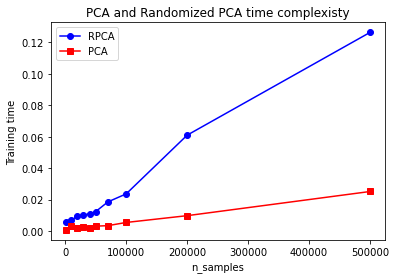

In [165]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver='full')
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)
    
plt.plot(sizes, times_rpca, 'b-o', label='RPCA')
plt.plot(sizes, times_pca, 'r-s', label='PCA')
plt.xlabel('n_samples')
plt.ylabel('Training time')
plt.legend(loc='upper left')
plt.title('PCA and Randomized PCA time complexisty')

And now let's compare their performance on datasets of 2,000 instances with various numbers of features:

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity')

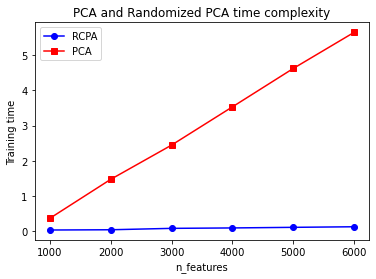

In [167]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver='randomized')
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver='full')
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)
    
plt.plot(sizes, times_rpca, 'b-o', label='RCPA')
plt.plot(sizes, times_pca, 'r-s', label='PCA')
plt.xlabel('n_features')
plt.ylabel('Training time')
plt.legend(loc='upper left')
plt.title('PCA and Randomized PCA time complexity')

## Kernel PCA

The kernel trick, the mathematical technique that implicity maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression with Support Vector Machines (SVM)

It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA). It is good at preserving clusters of instances after projections, or sometimes even unrolling datasets that lies close to a twisted manifold.

The following code uses Scikit-Learn's Kernel PCA class to perform kPCA with an RBF kernel.

In [187]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [188]:
from sklearn.decomposition import KernelPCA

In [189]:
rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.4)
X_reduced = rbf_pca.fit_transform(X)

The following figure shows the Swiss roll, reduced to two dimensions using a linear kernel (like the PCA class), and RBF kernel and a sigmoid kernel

In [190]:
lin_pca = KernelPCA(n_components = 2, kernel='linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel='sigmoid', gamma=0.001, fit_inverse_transform=True)

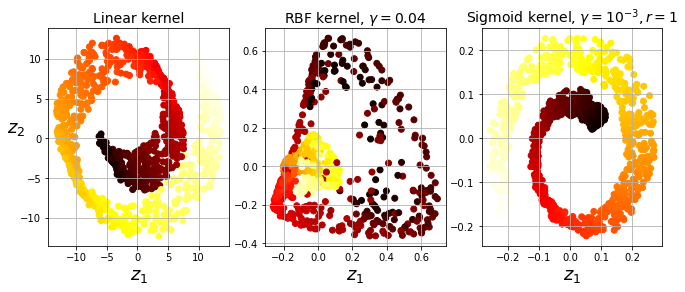

In [191]:
y = t > 6.9

plt.figure(figsize=(11,4))
for subplot, pca, title, in ((131, lin_pca, 'Linear kernel'), 
    (132, rbf_pca, 'RBF kernel, $\gamma=0.04$'), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
        
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel('$z_1$', fontsize=18)
    if subplot == 131:
        plt.ylabel('$z_2$', fontsize=18, rotation=0)
    plt.grid(True)
    
plt.show()

## Selecting a Kernel and Turning Hyperparameters

Since kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help in selecting the kernel and hyperparameters values. That said, dimensionality reduction is often a preparation step for a supervised learning task (like classification), so you can use grid search to select the kernel and hyperparameters that lead to the best performance on that task.

The following code creates a two-step pipeline, first reducing dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification. Then it uses GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [193]:
clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression(solver='lbfgs'))
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

Now let's check which ones are the best parameters

In [194]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


Another approach, completely unsupervised, is to select the kernel and hyperparameters that yield the lowest reconstruction error, but is not as easy as with linear PCA. To do this we can train a supervised regression model, with the projected instances as the training set and the original instances as the targets. Sciki-Learn will do this automatically if you set fit_inverse_transform = True, as shown in the following code:

In [198]:
rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.0433,
                   fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

By default, fit_inverse_transform=False and KernelPCA has no inverse_transform() method. This method only gets created when you set fit_inverse_transform=True

Now lets compute the reconstruction pre-image error:

In [199]:
from sklearn.metrics import mean_squared_error

In [200]:
mean_squared_error(X, X_preimage)

32.78630879576613

## Locally Linear Embedding (LLE)

LLE is a powerful nonlinear dimensionality reduction (NLDR) technique. It is a Manifold Learning technique that does not rely on projections. Like in a nutshell, LLE works firs by measuring how each training instance linearly relates to its closes neighbors (c.n.), and then looks for a low-dimensional representation of the training set where these local relationships are best preserved. LLE is a good approach to unroll twisted manifolds, especially when there is not too much noise.

The following code uses Scikit-Learn's LocallyLinearEmbedding class to unroll the Swiss roll:

In [201]:
from sklearn.manifold import LocallyLinearEmbedding


In [211]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)


In [212]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)


The resulting 2D dataset is shown below.

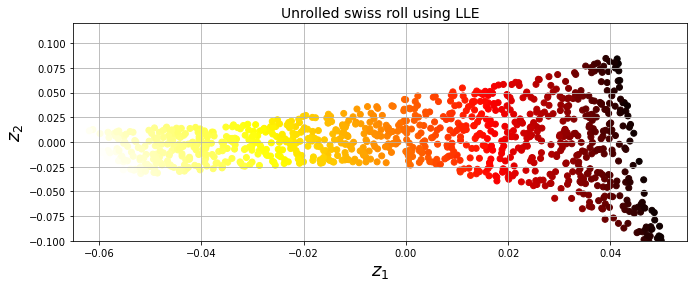

In [213]:
plt.figure(figsize=(11,4))
plt.title('Unrolled swiss roll using LLE', fontsize=14)
plt.scatter(X_reduced[:, 0 ], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()


The Swiss roll is completely unrolled, and the distances between instances are locally well preserved. However, distances are not preserved on a larger scale: the right part oof the unrolled Swiss roll is stretched, while the left part is squeezed. Nevertheless, LLE it's a good approach at modeling the manifold

## Other Dimensionality Reduction Techniques

There are many other dimensionality reduction techniques, several of which are available in Scikit-Learn. The following ones are the most popular:

- _Multidimensional Scaling (MDS)_: Reduces dimensionality while trying to preserve the distances between the instances.

The following code uses Scikit-Learn to apply Multidimensional Scaling (MDS):

In [214]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)


- _Isomap_: Creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances between the instances.

The following code uses Scikit-Learn to apply Isomap

In [216]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)


- _t-Distributed Stochastic Neighbor Embedding (t-SNE)_: Reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.

The following code uses Scikit-Learn to apply t-Distributed Stochastic Neighbor Embedding

In [217]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)


/Users/Frank/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/Frank/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finally the graphs of the differents manifolds are below

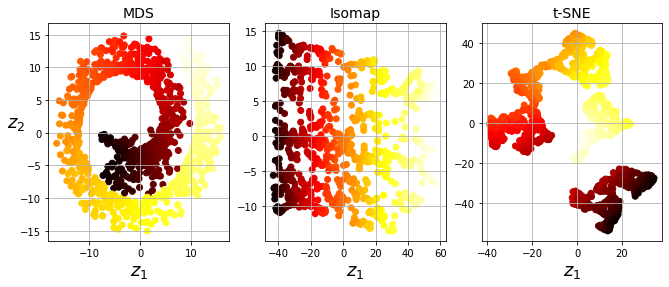

In [219]:
titles = ['MDS', 'Isomap', 't-SNE']

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                    (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel('$z_1$', fontsize=18)
    if subplot == 131:
        plt.ylabel('$z_2$', fontsize=18, rotation=0)
    plt.grid(True)

plt.show()    


# Figures

The following part of the script, explains how to get the first Figures, they are presented here because there was no explanation of the algorithms before they are used it in the explanation

In [73]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]
x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0,2] * x1 + R[1,2] * x2) / (1- R[2,2])

In [74]:
X3D_inv = pca.inverse_transform(X2D)

In [75]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

In [76]:
from mpl_toolkits.mplot3d import Axes3D

/var/folders/t2/44nqhw4n1vd0r1chg2wytynh0000gn/T/ipykernel_30476/2393388762.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], 'k-', color='#505050')


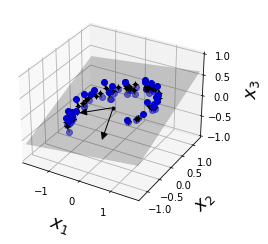

In [77]:
fig = plt.figure(figsize=(6,3.8))
ax = fig.add_subplot(111,projection='3d')

X3D_above = X[X[:,2] > X3D_inv[:,2]]
X3D_below = X[X[:,2] <= X3D_inv[:,2]]

ax.plot(X3D_below[:,0], X3D_below[:,1], X3D_below[:,2],'bo', alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color='k')
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], 'k.')

for i in range(m):
    if X[i,2] > X3D_inv[i,2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], 'k-')
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], 'k-', color='#505050')

ax.plot(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2], 'k+')
ax.plot(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2], 'k.')
ax.plot(X3D_above[:,0], X3D_above[:,1], X3D_above[:,2], 'bo')
ax.set_xlabel('$x_1$', fontsize=18, labelpad=10)
ax.set_ylabel('$x_2$', fontsize=18, labelpad=10)
ax.set_zlabel('$x_3$', fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

figure_1 = plt.show()

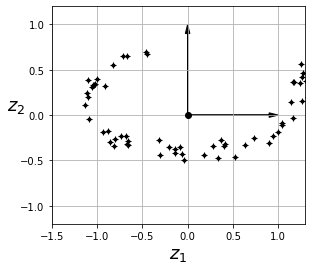

In [50]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, aspect='equal')

ax.plot(X2D[:,0], X2D[:,1], 'k+')
ax.plot(X2D[:,0], X2D[:,1], 'k.')
ax.plot([0,], [0], 'ko')
ax.arrow(0,0,0,1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0,0,1,0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel('$z_1$', fontsize=18)
ax.set_ylabel('$z_2$', fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

In [53]:
from sklearn.datasets import make_swiss_roll

In [84]:
X_roll, t_roll = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

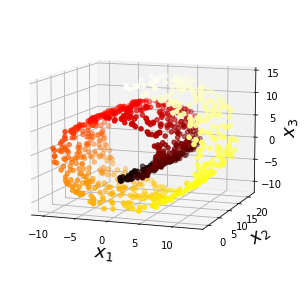

In [85]:
axes_roll = [-11.5, 14, -2, 23, -12, 15]

fig3 = plt.figure(figsize=(6, 5))
ax = fig3.add_subplot(111, projection='3d')

ax.scatter(X_roll[:, 0], X_roll[:, 1], X_roll[:, 2], c=t_roll, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes_roll[0:2])
ax.set_ylim(axes_roll[2:4])
ax.set_zlim(axes_roll[4:6])

plt.show()

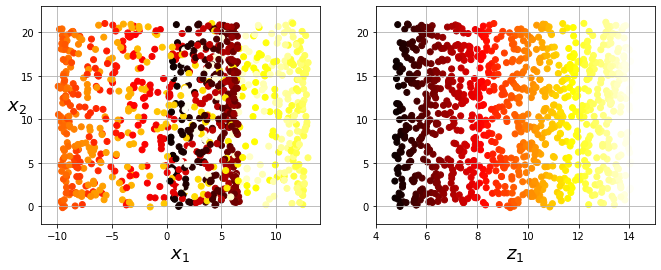

In [88]:
fig4 = plt.figure(figsize=(11,4))

plt.subplot(121)
plt.scatter(X_roll[:,0], X_roll[:,1], c=t_roll, cmap=plt.cm.hot)
plt.axis(axes_roll[:4])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_roll[:,1], c=t_roll, cmap=plt.cm.hot)
plt.axis([4,15, -2, 23])
plt.xlabel('$z_1$', fontsize=18)
plt.grid(True)

plt.show()

In [91]:
from matplotlib import gridspec

<function matplotlib.pyplot.show(close=None, block=None)>

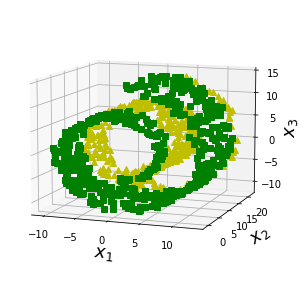

In [95]:
x3s = np.linspace(axes_roll[2], axes_roll[3], 10)
x4s = np.linspace(axes_roll[4], axes_roll[5], 10)
x3, x4 = np.meshgrid(x3s, x4s)

fig5 = plt.figure(figsize=(6,5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t_roll[:] - 4) > X_roll[:,1]
X_pos = X_roll[positive_class]
X_neg = X_roll[~positive_class]
ax.view_init(10,-70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], 'y^')
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], 'gs')
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)
ax.set_xlim(axes_roll[0:2])
ax.set_ylim(axes_roll[2:4])
ax.set_zlim(axes_roll[4:6])

plt.show

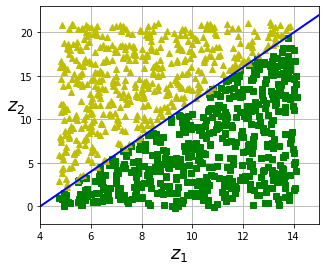

In [100]:
fig6 = plt.figure(figsize=(5,4))
ax = plt.subplot(111)

plt.plot(t_roll[positive_class], X_roll[positive_class, 1], 'gs')
plt.plot(t_roll[~positive_class], X_roll[~positive_class, 1], 'y^')
plt.plot([4, 15], [0, 22], 'b-', linewidth=2)
plt.axis([4, 15, axes_roll[2], axes_roll[3]])
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation=0)
plt.grid(True)

(-12.0, 15.0)

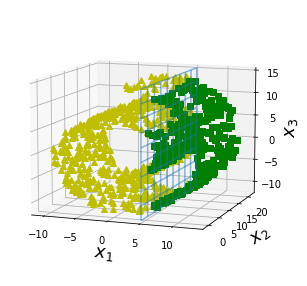

In [102]:
fig7 = plt.figure(figsize=(6,5))
ax = plt.subplot(111, projection='3d')

positive_class = X_roll[:,0] > 5
X_pos = X_roll[positive_class]
X_neg = X_roll[~positive_class]
ax.view_init(10,-70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], 'y^')
ax.plot_wireframe(5, x3, x4, alpha = 0.5)
ax.plot(X_pos[:,0], X_pos[:,1], X_pos[:,2], 'gs')
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)
ax.set_xlim(axes_roll[0:2])
ax.set_ylim(axes_roll[2:4])
ax.set_zlim(axes_roll[4:6])

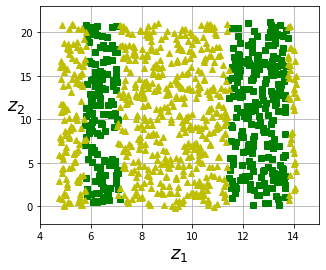

In [104]:
fig8 = plt.figure(figsize=(5,4))
ax = plt.subplot(111)

plt.plot(t_roll[positive_class], X_roll[positive_class, 1], 'gs')
plt.plot(t_roll[~positive_class], X_roll[~positive_class, 1], 'y^')
plt.axis([4, 15, axes_roll[2], axes_roll[3]])
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation=0)
plt.grid(True)
plt.show()

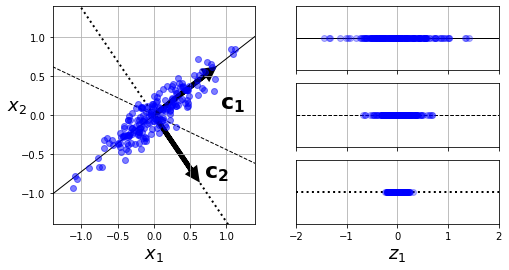

In [110]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X2 = np.random.randn(m, 2) / 10
X2 = X2.dot(np.array([[stretch, 0],[0, 1]]))
X2 = X2.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X2_proj1 = X2.dot(u1.reshape(-1,1))
X2_proj2 = X2.dot(u2.reshape(-1,1))
X2_proj3 = X2.dot(u3.reshape(-1,1))

fig9 = plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0,0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], 'k-', linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], 'k--', linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], 'k:', linewidth=2)
plt.plot(X2[:,0],X2[:,1], 'bo', alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.5, r'$\mathbf{c_1}$', fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r'$\mathbf{c_2}$', fontsize=22)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2),(0,1))
plt.plot([-2, 2], [0, 0], 'k-', linewidth=1)
plt.plot(X2_proj1[:, 0], np.zeros(m), 'bo', alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2),(1,1))
plt.plot([-2, 2], [0, 0], 'k--', linewidth=1)
plt.plot(X2_proj2[:, 0], np.zeros(m), 'bo', alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2),(2,1))
plt.plot([-2, 2], [0, 0], 'k:', linewidth=2)
plt.plot(X2_proj3[:, 0], np.zeros(m), 'bo', alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel('$z_1$', fontsize=18)
plt.grid(True)

plt.show()